# Gaussian Mixture Model (GMM) Clustering

A simple implementation of GMM for clustering data with overlapping Gaussian distributions.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
np.random.seed(42)

## Generate Synthetic Data

Creating overlapping Gaussian clusters - ideal for GMM.

Dataset shape: (300, 2)
Number of true clusters: 3


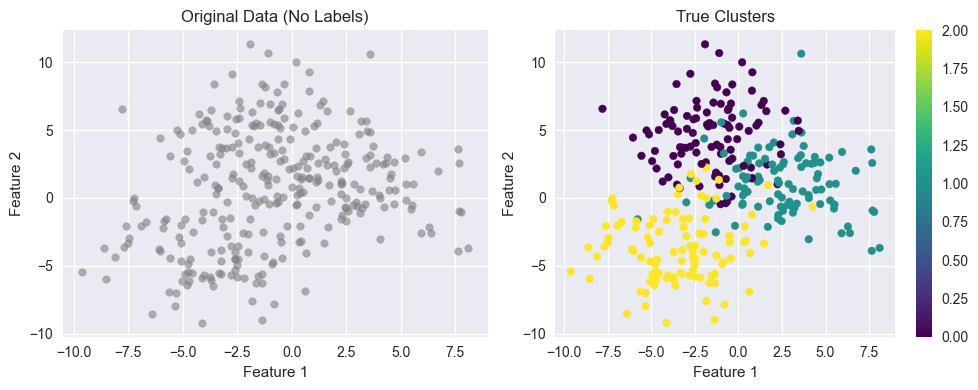

In [6]:
# Generate synthetic data with overlapping clusters
# Higher std and closer centers for significant overlap
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=2.5, 
                       center_box=(-5.0, 5.0), random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Number of true clusters: {len(np.unique(y_true))}")

# Visualize the original data
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6, s=30)
plt.title('Original Data (No Labels)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30)
plt.title('True Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()

## Apply Gaussian Mixture Model

In [7]:
# Apply GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
y_pred = gmm.fit_predict(X)

# Get cluster probabilities for each point
probabilities = gmm.predict_proba(X)

print(f"Number of components: {gmm.n_components}")
print(f"Converged: {gmm.converged_}")
print(f"AIC: {gmm.aic(X):.2f}")
print(f"BIC: {gmm.bic(X):.2f}")
print(f"Adjusted Rand Score: {adjusted_rand_score(y_true, y_pred):.3f}")

# Show cluster centers and covariances
print(f"\nCluster centers:")
for i, center in enumerate(gmm.means_):
    print(f"Cluster {i}: ({center[0]:.2f}, {center[1]:.2f})")
    
print(f"\nMixing weights: {gmm.weights_}")

Number of components: 3
Converged: True
AIC: 3237.20
BIC: 3300.16
Adjusted Rand Score: 0.609

Cluster centers:
Cluster 0: (-1.79, 4.77)
Cluster 1: (2.13, 1.11)
Cluster 2: (-3.76, -4.12)

Mixing weights: [0.30177028 0.40000968 0.29822004]


## Visualize Results

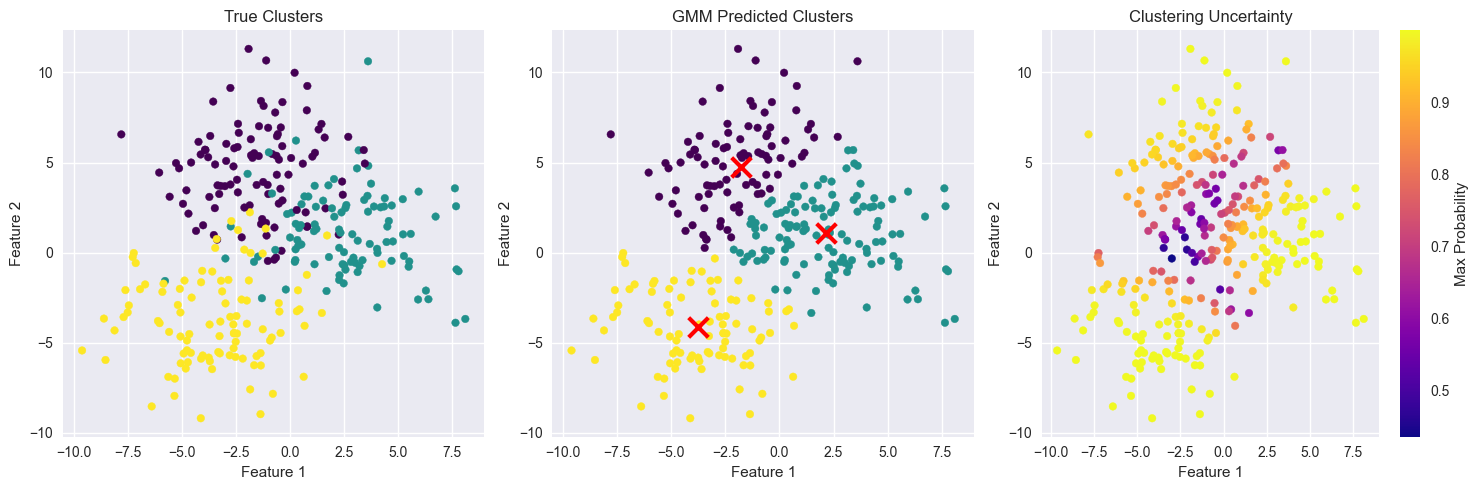

In [8]:
# Visualize clustering results
plt.figure(figsize=(15, 5))

# True clusters
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30)
plt.title('True Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# GMM predicted clusters
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=200, linewidth=3)
plt.title('GMM Predicted Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Uncertainty visualization (using max probability)
plt.subplot(1, 3, 3)
max_prob = np.max(probabilities, axis=1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=max_prob, cmap='plasma', s=30)
plt.colorbar(scatter, label='Max Probability')
plt.title('Clustering Uncertainty')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

## Model Selection

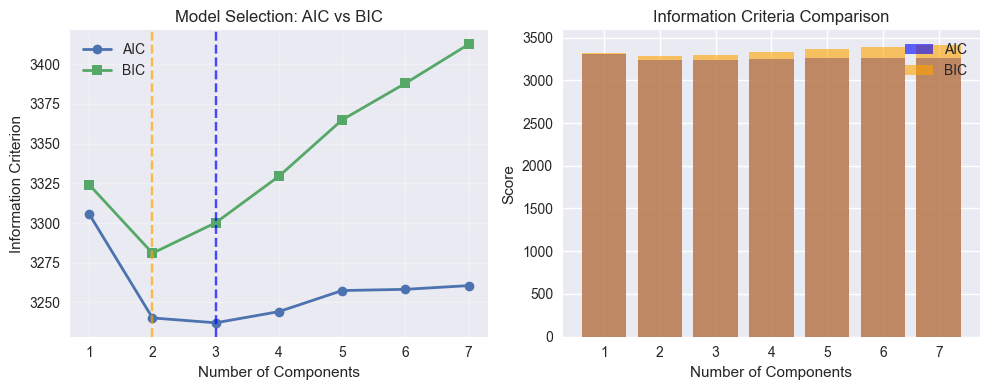

Optimal number of components:
AIC: 3
BIC: 2
True number of clusters: 3


In [9]:
# Find optimal number of clusters using AIC and BIC
n_components_range = range(1, 8)
aic_scores = []
bic_scores = []

for n_comp in n_components_range:
    gmm_temp = GaussianMixture(n_components=n_comp, random_state=42)
    gmm_temp.fit(X)
    aic_scores.append(gmm_temp.aic(X))
    bic_scores.append(gmm_temp.bic(X))

# Plot model selection criteria
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic_scores, 'o-', label='AIC', linewidth=2)
plt.plot(n_components_range, bic_scores, 's-', label='BIC', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('Model Selection: AIC vs BIC')
plt.legend()
plt.grid(True, alpha=0.3)

# Find optimal number
optimal_aic = n_components_range[np.argmin(aic_scores)]
optimal_bic = n_components_range[np.argmin(bic_scores)]

plt.axvline(x=optimal_aic, color='blue', linestyle='--', alpha=0.7, label=f'Optimal AIC: {optimal_aic}')
plt.axvline(x=optimal_bic, color='orange', linestyle='--', alpha=0.7, label=f'Optimal BIC: {optimal_bic}')

# Summary statistics
plt.subplot(1, 2, 2)
components = list(n_components_range)
plt.bar([str(c) for c in components], aic_scores, alpha=0.6, label='AIC', color='blue')
plt.bar([str(c) for c in components], bic_scores, alpha=0.6, label='BIC', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('Information Criteria Comparison')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Optimal number of components:")
print(f"AIC: {optimal_aic}")
print(f"BIC: {optimal_bic}")
print(f"True number of clusters: 3")

## Summary

GMM successfully identified the 3 overlapping Gaussian clusters with soft assignments and probability estimates for each point's cluster membership.